# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\omar2\Downloads\Online Retail.csv") 

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
duplicate_rows_df = df[df.duplicated()]
print("number of rows: ", df.shape)
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of rows:  (541909, 8)
number of duplicate rows:  (5268, 8)


In [4]:
df = df.drop_duplicates()

In [5]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [6]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [7]:
df = df.dropna()    # Dropping the missing values.
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [8]:
statistics = df.describe()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

statistics

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


<Axes: xlabel='UnitPrice'>

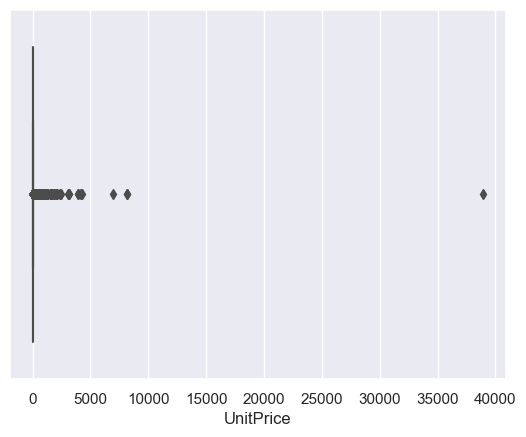

In [9]:
import seaborn as sns                       
import matplotlib.pyplot as plt           
%matplotlib inline     
sns.set(color_codes=True)

sns.boxplot(x=df['UnitPrice'])

<Axes: xlabel='Quantity'>

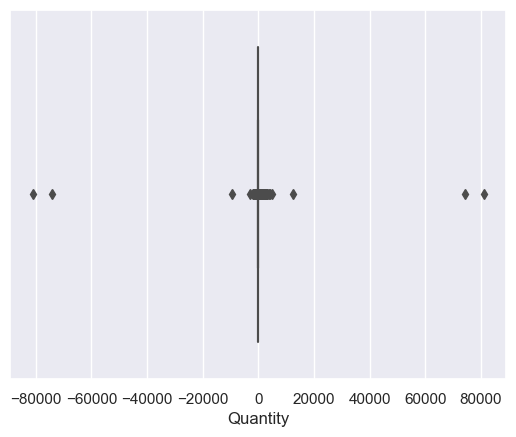

In [10]:
sns.boxplot(x=df['Quantity'])

In [11]:
df[["StockCode", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"]]


,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


Text(0.5, 0, 'Counrty')

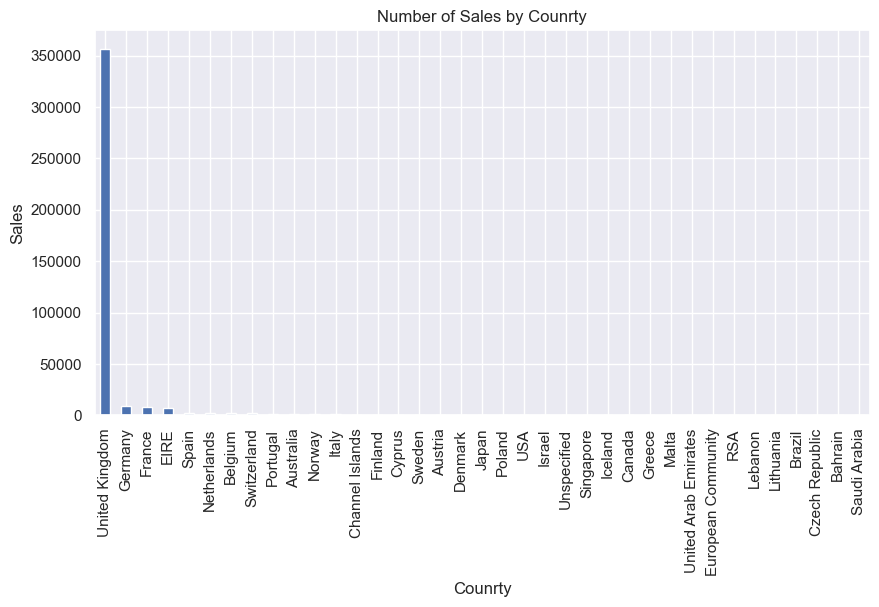

In [12]:
df.Country.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Sales by Counrty")
plt.ylabel('Sales')
plt.xlabel('Counrty')

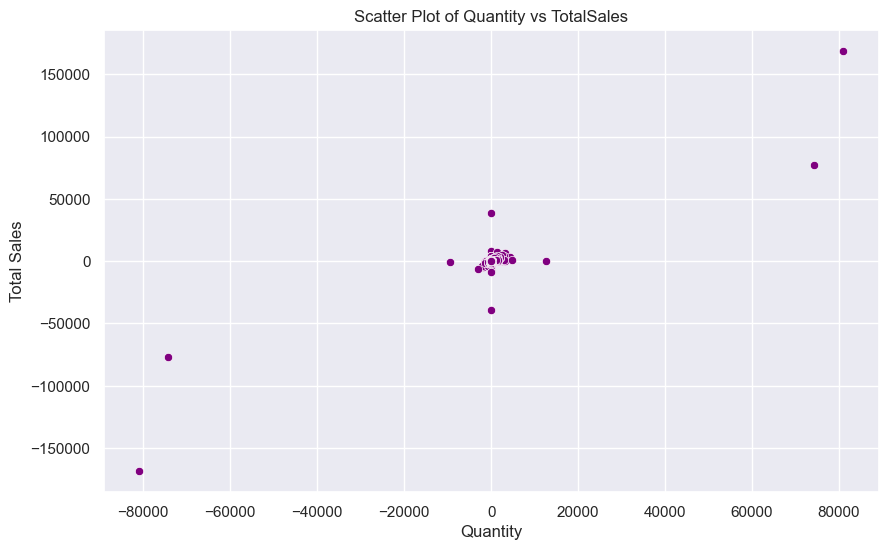

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='TotalSales', color='purple')
plt.title('Scatter Plot of Quantity vs TotalSales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

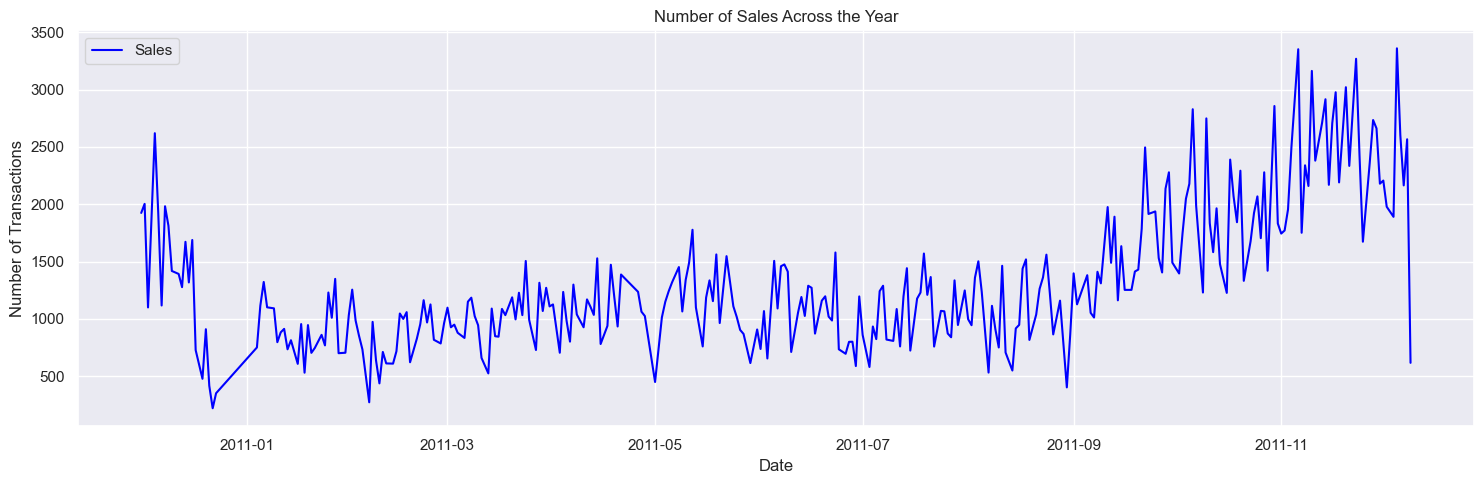

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

transactions_per_day = df.groupby(df['InvoiceDate'].dt.date).size()

plt.figure(figsize=(15, 5))
plt.plot(transactions_per_day.index, transactions_per_day.values, label='Sales', color='blue')
plt.title('Number of Sales Across the Year')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()

plt.show()

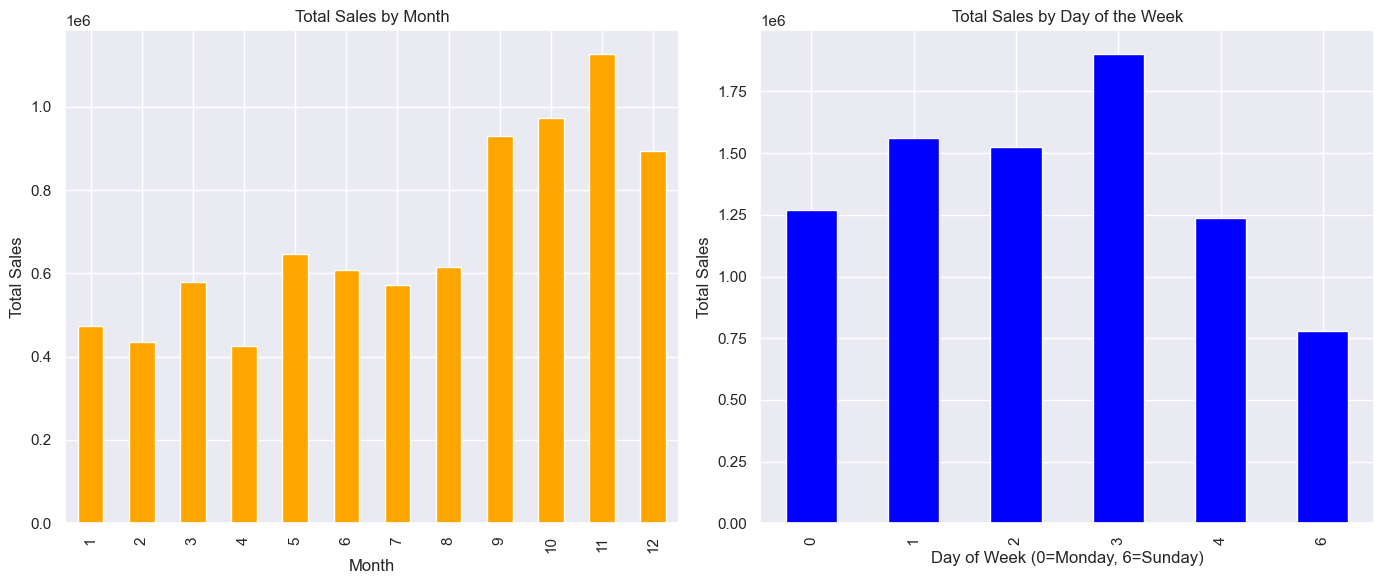

In [15]:
monthly_sales = df.groupby('Month')['TotalSales'].sum()

day_of_week_sales = df.groupby('DayOfWeek')['TotalSales'].sum()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
day_of_week_sales.plot(kind='bar', color='blue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

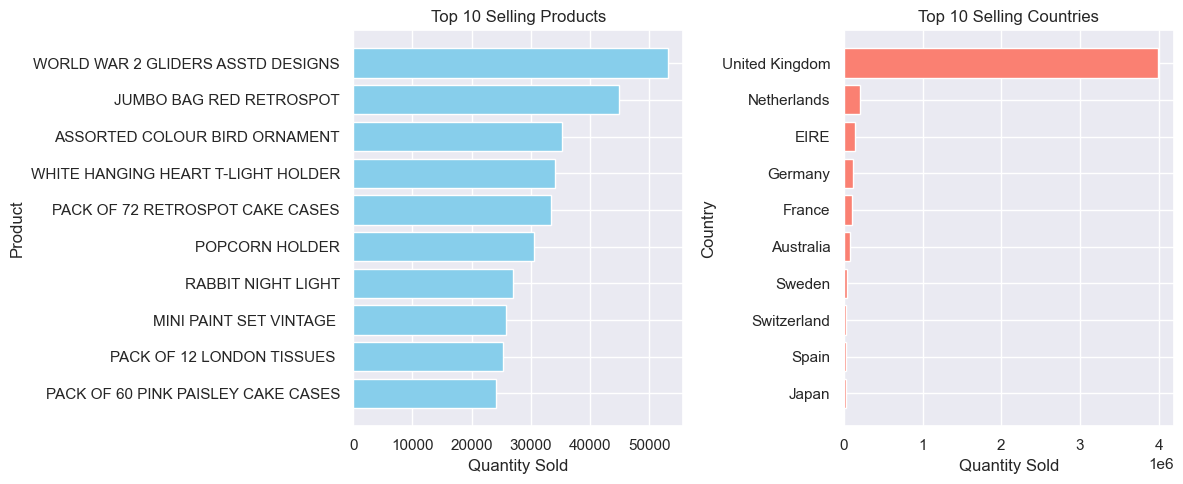

In [16]:
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_selling_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

top_selling_products_df = top_selling_products.reset_index()
top_selling_products_df.columns = ['Product', 'Quantity Sold']

top_selling_countries_df = top_selling_countries.reset_index()
top_selling_countries_df.columns = ['Country', 'Quantity Sold']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(top_selling_products_df['Product'], top_selling_products_df['Quantity Sold'], color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.gca().invert_yaxis() 

plt.subplot(1, 2, 2)
plt.barh(top_selling_countries_df['Country'], top_selling_countries_df['Quantity Sold'], color='salmon')
plt.title('Top 10 Selling Countries')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.gca().invert_yaxis()   

plt.tight_layout()
plt.show()